## <center> Q&A Activity Week - 14

### 1) Reading the dataset to python environment 

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the data set
data=pd.read_csv('Country-data.csv')

In [3]:
data # to get an idea about the structure of the data set

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

The dataset consist of 167 rows and 10 columns

### 2) Preprocessing

In [5]:
# Checking the data types of different features
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
#checking for null values in the data set
data.isnull().sum()          

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

 No null values present in the dataset

In [7]:
# exports, import and health are given as % of of gdp. lets convert them into exact nos.
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [8]:
# Making the dataset suitable for unsupervised learning by avoiding the country column 

In [9]:
df=data.iloc[:,1:10]  #new data frame has been used since the old one is needed in inference section
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
#checking the size of the dataframe
df.shape

(167, 9)

167 rows and 9 columns are present in the datadrame created for unsupervised learning

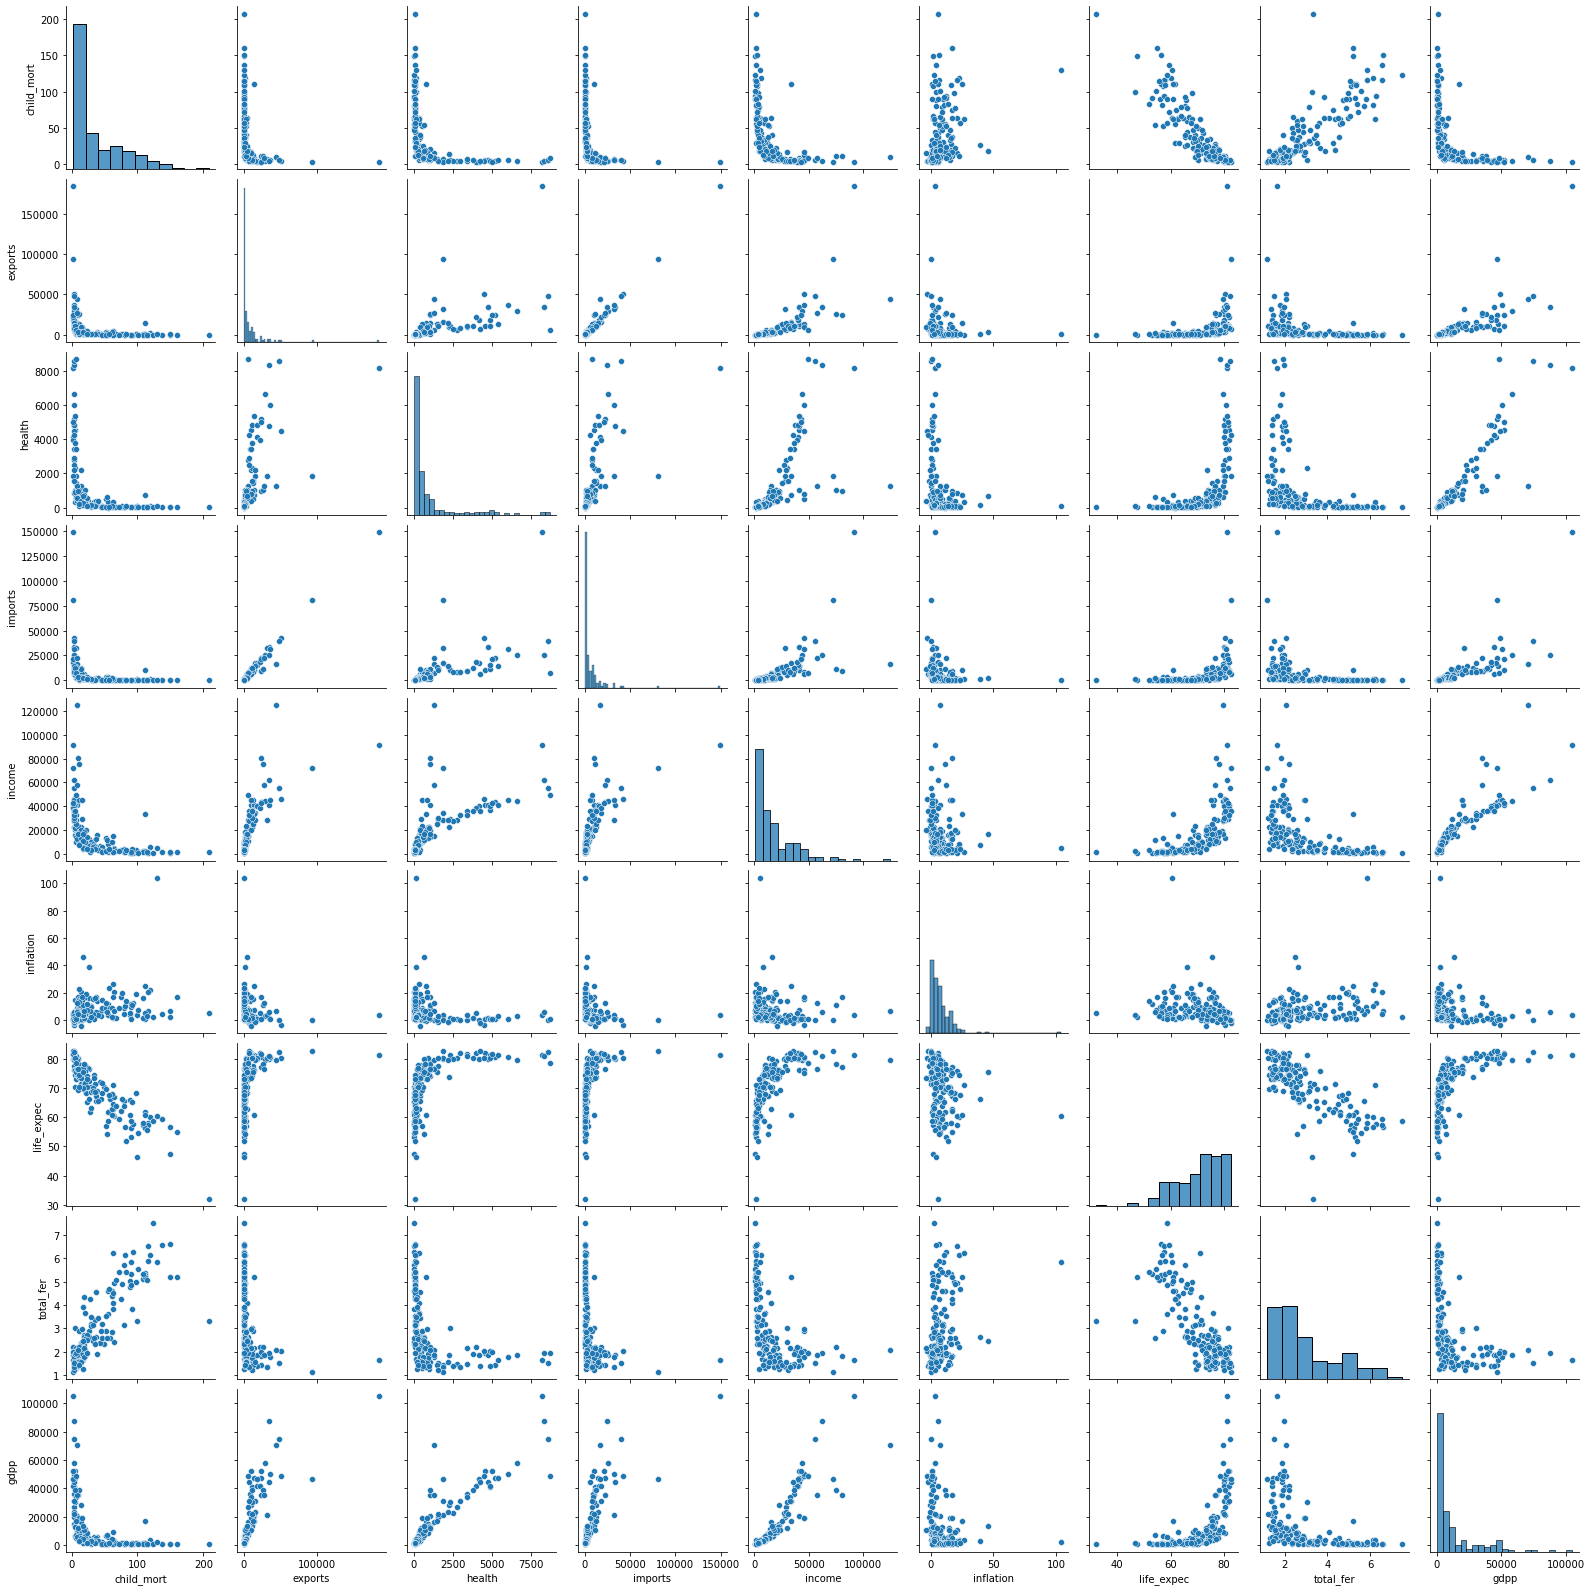

In [11]:
#pairplot
import seaborn as sns
sns.pairplot(df)

In [12]:
#Checking outliers 

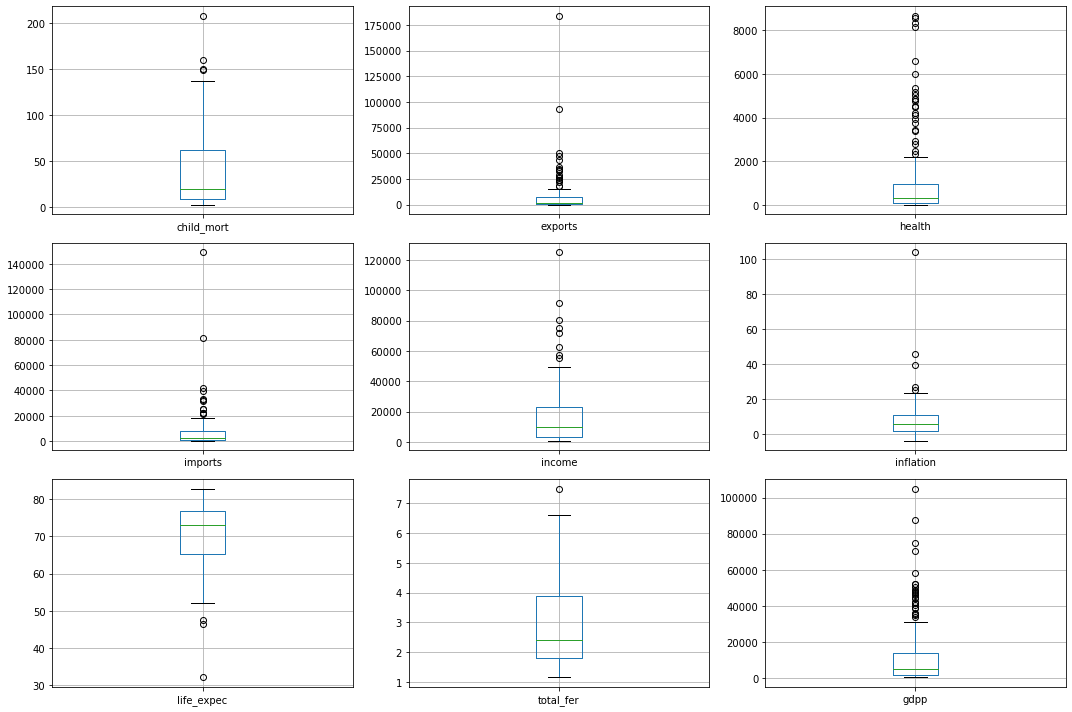

In [13]:
#  Categorical Data
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in df.columns:
    plt.subplot(a, b, c)
    #plt.title('{}'.format(i),fontsize=20)
    df.boxplot([i])
    c = c + 1

plt.tight_layout()
plt.show()

All the features have outliers. If  outliers are removed ,then this will change the ranking of few countries with respect to requirement of Financial Aid. If outlier is  treated by deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid.If Outlier is ignored, it can impact the clustering model, as the presence of Outlier can change the CENTROID (K-Means) of the cluster.

Thus, instead of deleting the outliers, going to cap only the necessary features ( upper or lower based on feature importance). The capping will be done based on 1% for lower and 99% for the upper values.

1)child_mort higher values are critical as those countries should be considered for Aid, thus we will not cap the child_mort feature,so leaving it as it is.

2)life_expec lower values are critical as these countries generally tend to have low income and low spent on healthcare. They will be in need of aid,so leaving it as it is.

3)If GDP,Income, Health spent are higher for certain countries, then they do not normally require aid as healthcare system tends to be in a better condition there and overall life expectency and standard of living will be higher. These will be most probably developed or developing country. Aid should be targetted towards underdeveloped countries. Thus capping the gdpp , health and income features for the upper range only.

4)For exports(considerably,higher exports indicates prosperity) capping the upper limit as there are no lower side outliers

5)Inflation shows the distress in economy,so not removing the outliers

Leaving the rest as it is.

In [15]:
#finding the 99th percentile value to cap
up_gdpp = df['gdpp'].quantile(0.99)
up_income = df['income'].quantile(0.99)
up_health = df['health'].quantile(0.99)
up_export = df['exports'].quantile(0.99)
#up_import = df['imports'].quantile(0.99)

# capping the values
df['gdpp'][df['gdpp'] >=up_gdpp] = up_gdpp
df['income'][df['income'] >=up_income] = up_income
df['health'][df['health'] >=up_health] = up_health
df['exports'][df['exports'] >=up_export] = up_export

In [17]:
# Applying standard scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df)
df_hac=df_scaled.copy()

### 2) Model Building

### 2.1) k-means clustering

In [19]:
#finding the optimum number of clusters using elbow method 

In [20]:
from sklearn.cluster import KMeans
ks=range(1,6)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)


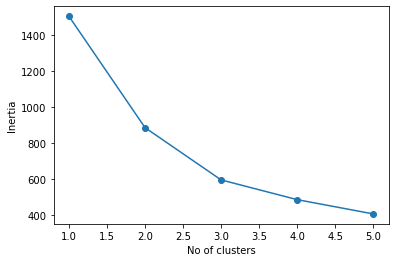

In [21]:
# plotting the number of clusters and inertia
plt.plot(ks,inertia,'-o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

In [22]:
#Optimum number of clusters=3 (evident from the picture)

In [23]:
# Performing standard scaling and kmeans clustering together

In [24]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df_scaled) 
print(y_kmeans)

[0 1 1 0 1 1 1 2 2 1 1 1 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 1 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 1 1 1 0 0 1 0 1 2 1 1 1 0 2
 1 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 1 2 1 1 0 1 1 0 1 1 0 2 1 1 0 0 1 1 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [25]:
#Evaluating the efficiency of the model

In [26]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled,kmeans.labels_, metric='euclidean',random_state=42)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.422


### 2.2) Heirachical Agglomertive clustering

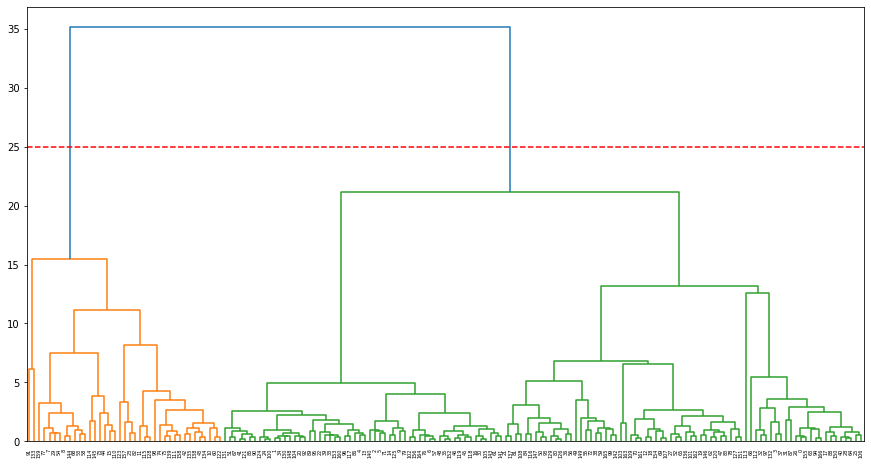

In [27]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df_hac,method='ward')
# complete and average method is also there
#plotting the dendrogram
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(25,0,5000,colors='r',linestyles='dashed' )
plt.show()

With no.of clusters=2 grouping may not be adequate to take a decision on financial aid,so choosing the next best .i.e, no of clusters=3

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(df_hac)
labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1], dtype=int64)

In [29]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_hac,labels,metric='euclidean',random_state=42)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.301


On comparing Silhouetter Score,Kmeans clustering performs better

Choosing Kmeans-clustering(with number of clusters=3 )for finding the countries which are in dire need of financial aid

### 3) Analysis of clusters with Kmeans-clustering(number of clusters=3 )

In [30]:
df['cluster_no']=kmeans.labels_
data['cluster_no']=kmeans.labels_

In [31]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,1
2,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,1
3,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,1
5,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,1
6,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,1
7,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,2
8,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,2
9,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,1


In [32]:
#New dataframe for group by & analysis
df_new =  df.groupby(['cluster_no']).mean()
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_no,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565
2,5.092593,25724.622844,4359.079832,26469.600000,48872.826667,3.120407,80.462963,1.775185,47257.475556


In [33]:
# Creating a new field for count of observations in each cluster
df_new['No of countries']=data.groupby('cluster_no')['country'].count()
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,No of countries
cluster_no,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,48
1,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565,92
2,5.092593,25724.622844,4359.079832,26469.600000,48872.826667,3.120407,80.462963,1.775185,47257.475556,27


In [34]:
# Creating a new field for finding the proportion of countries in each cluster
df_new['Contries_Pro']=round(df_new['No of countries']/df_new['No of countries'].sum(),2)
df_new


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,No of countries,Contries_Pro
cluster_no,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,48,0.29
1,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565,92,0.55
2,5.092593,25724.622844,4359.079832,26469.600000,48872.826667,3.120407,80.462963,1.775185,47257.475556,27,0.16


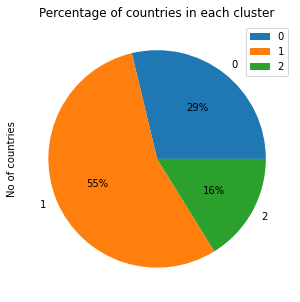

In [35]:
df_new.plot.pie(y='No of countries', figsize=(5,5),autopct='%1.0f%%',title='Percentage of countries in each cluster')
plt.show()

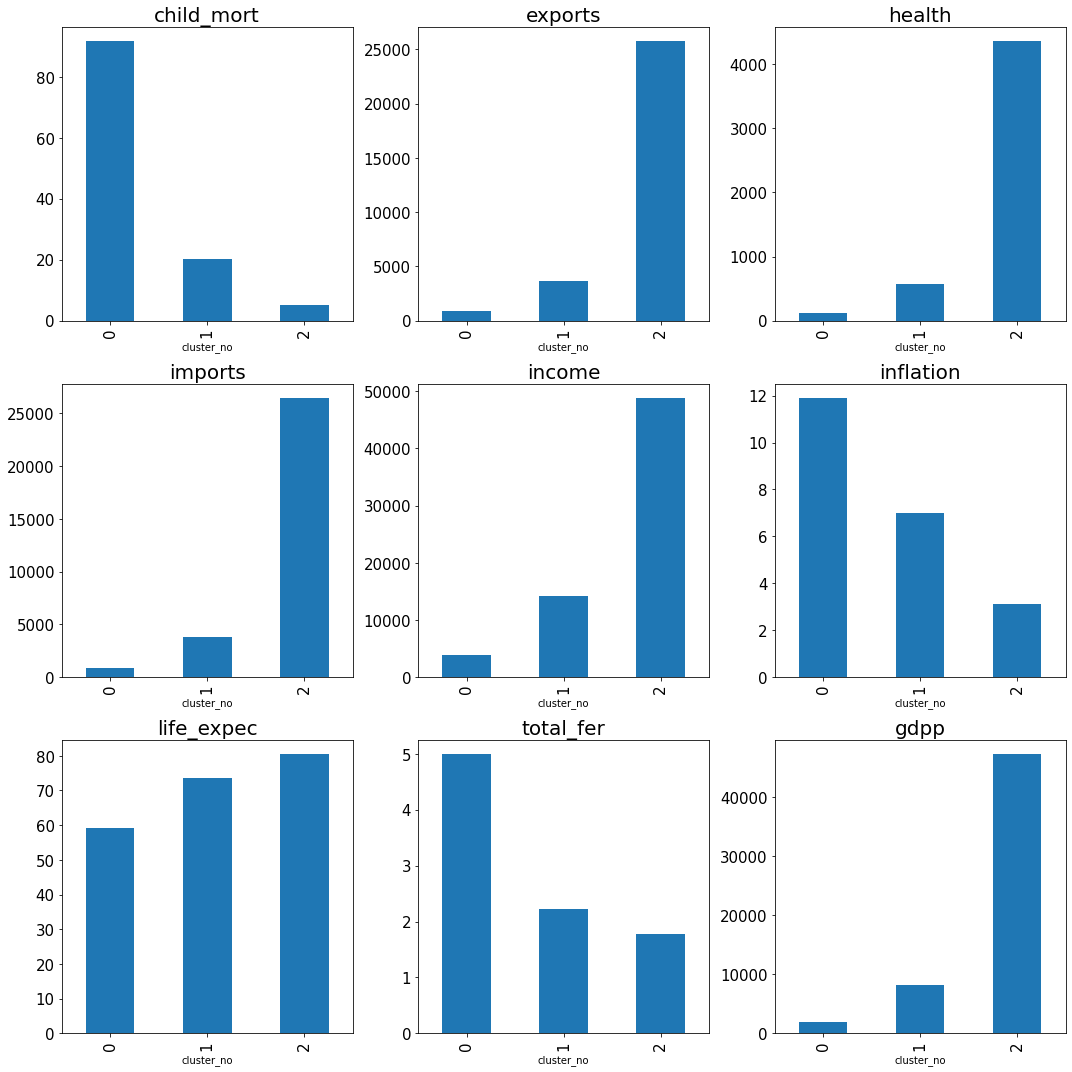

In [36]:
df_g=df_new.copy() # for plotting purpose only
df_g.drop(['No of countries','Contries_Pro'], axis = 1, inplace = True)
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in df_g.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=20)
    df_g[i].plot(kind='bar', fontsize=15)
    c = c + 1

plt.tight_layout()
plt.show()

From the above graphs,we get a clear understanding of clusters

Cluster 0 :It has highest child mortality,Lowest income,Lowest GDP,Lowest health expenditure,The highest inflation,Compartively low life expectancy,Highest total fertility

Cluster 2:Lowest child mortality,Highest income,Highest GDP,Highest health spending,The Lowest inflation,high life expectancy,Lowest total fertility

Cluster 1: Placed in between Cluster 0 & 1 

Based on these analysis,

Cluster 0(represents):Under devloped countries

Cluster 1(represents):Developing countries

Cluster 2(represents):Developed countries

###  4) Inference 

cluster 0 (Under developed countries) should be considered for NGO aid

48 countries are there in cluster 0

In [37]:
cluster0=data[data['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True])


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.790,60.8,4.60,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.600,61.7,4.61,482,0


Sorting has been done with preference to gdpp ,this can be changed according the NGO'S criteria.

Since there are 48 countries in the cluster,its the prerogative of the organisation how to divide the financial aid.

whether to divide the financial aid among all these countries,or top 10(or any number)deficient countries based on gdpp or child mortality or any other feature.

In [38]:
# Suggesting 10 underdeveloped countries which are in dire need of financial aid (sorting based on gdpp)

In [39]:
cluster0=data[data['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0
